In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from scipy import interpolate




In [2]:
path_dir = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take"
# file_path = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take\\1mm.dat"


fields_df = pd.DataFrame({'B':[], 'X':[], 'Y':[], 'Z':[]})

for address, dirs, files in os.walk(path_dir):
    for file in files:
        if ".dat" in str(file):
            z = re.search(r'([0-9]+)',file)
            z_coord = z[0]
            file_path = os.path.join(address,file)

            field_i = pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','X','Y'],skiprows=[0])
            field_i['Z'] = int(z_coord)
            # print(z_coord)

            fields_df = pd.concat([fields_df,field_i])
            # print(field_i['B'])



# print(fields_df)
# fields_df['B'].plot()
# plt.show()



In [3]:
fields_res = fields_df[fields_df['B']>1]


fig = px.scatter_3d(fields_df, x='X', y='Y', z='Z', color='B', opacity=0.8, color_continuous_scale='Spectral_r')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)


fig.update_traces(marker={'size': 2})

fig.show()

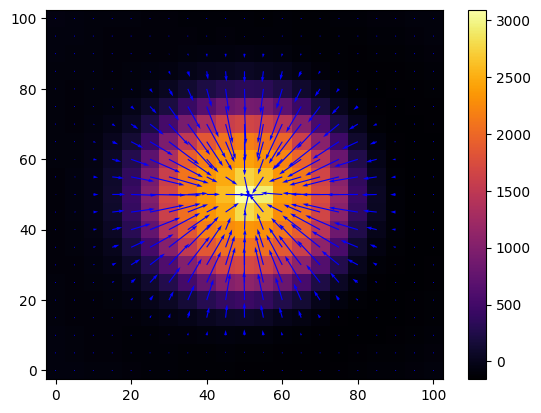

In [41]:
field_flat_xy = fields_df[fields_df['Z']==1].copy()
field_flat_xy_sorted = field_flat_xy.sort_values(by = ['X','Z'])
field_flat_np_xy = field_flat_xy_sorted.to_numpy()
field_flat_square_xy = np.reshape(field_flat_np_xy[:,0],(21,21))

xs = field_flat_xy_sorted['X'].drop_duplicates().to_numpy()
ys = field_flat_xy_sorted['Y'].drop_duplicates().to_numpy()

fig, ax = plt.subplots()
plt.pcolormesh(xs, xs, field_flat_square_xy, cmap='inferno')
plt.colorbar()

dx,dy = np.gradient(field_flat_square_xy)
ax.quiver(ys, xs, dy, dx, color = 'blue')
# print(field_flat_square_xy)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


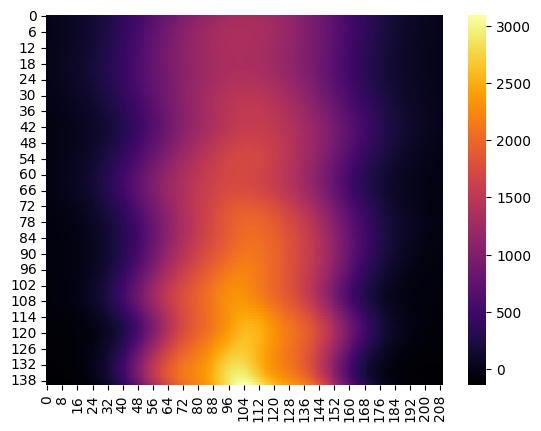

In [20]:
field_flat = fields_df[fields_df['Y']==50].copy()
field_flat_sorted = field_flat.sort_values(by = ['X','Z'])
field_flat_np = field_flat_sorted.to_numpy()
field_flat_square = np.reshape(field_flat_np[:,0],(21,14))

field_flat_square_rot = np.rot90(field_flat_square)


xs = field_flat_sorted['X'].drop_duplicates().to_numpy()
zs = field_flat_sorted['Z'].drop_duplicates().to_numpy()

xs_i = np.linspace(min(xs),max(xs),210)
zs_i = np.linspace(min(zs),max(zs),140)


f = interpolate.interp2d(xs,zs,field_flat_square_rot,kind='cubic')

interpolated_field_square = f(xs_i,zs_i)

plot = sns.heatmap(interpolated_field_square, cmap='inferno')
# x_labels = xs
# plot.set_xticks(range(21))
# plot.set_xticklabels(x_labels)
print(xs)

(14, 21)


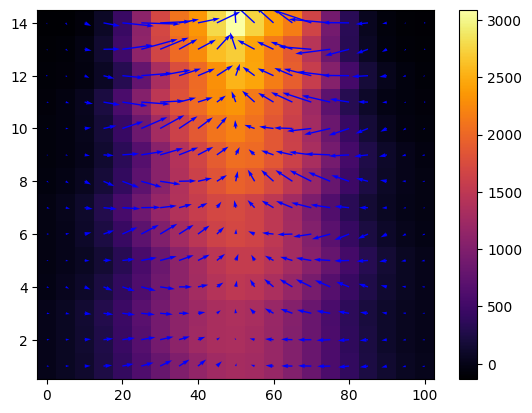

In [42]:
dz,dx = np.gradient(field_flat_square_rot)
fig, ax = plt.subplots()
plt.pcolormesh(xs, zs, field_flat_square_rot,cmap='inferno')
plt.colorbar()
ax.quiver(xs, zs, dx, dz, color = 'blue')

print(np.shape(dz))

Interactive side view on the y=50 mm made in plotly

In [6]:
fig = px.scatter(field_flat, x='X', y='Z', color='B', opacity=1, color_continuous_scale='inferno')
fig.update_traces(marker={'size': 10})
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)


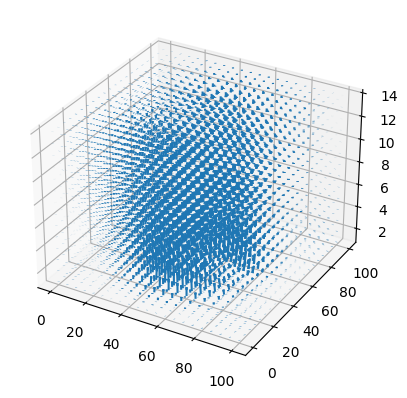

In [19]:
fields_pivoted_np = fields_df.pivot_table(index="Y", columns=["Z", "X"], values="B").to_numpy()
fields_flat = fields_pivoted_np.flatten()
# print(np.shape(fields_pivoted_np))

fields_cubed = np.empty([14,21,21])
n = 0

for i in range(0,294,21):
    fields_cubed[n,:,:] = fields_pivoted_np[:,i:i+21]
    n = n+1



# x = np.linspace(0,100,21)
# y = np.linspace(0,100,21)
# z = np.linspace(1,14,14)

u,v,w = np.gradient(fields_cubed)

x, y, z = np.meshgrid(np.arange(0, 105, 5), np.arange(1, 15, 1), np.arange(0, 105, 5))


ax = plt.axes(projection = "3d")
ax.quiver(x,z,y,u,v,w, length = 0.002)
# ax.view_init(elev=45, azim=45)
# print(np.shape(x))

